In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('/content/Medical Price Dataset.csv')

In [16]:
data


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [23]:
data.shape

(1338, 5)

In [24]:
data.describe()

,bmi,children,charges
count,1338.000000,1338.000000,1338.000000
mean,30.663397,1.094918,13270.422265
std,6.098187,1.205493,12110.011237
min,15.960000,0.000000,1121.873900
25%,26.296250,0.000000,4740.287150
50%,30.400000,1.000000,9382.033000
75%,34.693750,2.000000,16639.912515
max,53.130000,5.000000,63770.428010


In [25]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   bmi       1338 non-null   float64
 1   children  1338 non-null   int64  
 2   smoker    1338 non-null   object 
 3   region    1338 non-null   object 
 4   charges   1338 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 52.4+ KB


In [27]:
data.isnull().sum()

bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [30]:
data.columns

Index(['bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [32]:
data['bmi'] = data['bmi'].map({'children': 0, 'smoker': 1})
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})
data.head()

,bmi,children,smoker,region,charges
0,NaN,0,1,southwest,16884.92400
1,NaN,1,0,southeast,1725.55230
2,NaN,3,0,southeast,4449.46200
3,NaN,0,0,northwest,21984.47061
4,NaN,0,0,northwest,3866.85520


In [36]:
bins = [17,35,55,1000]
slots = ['Young adult','Senior Adult','Elder']

data['bmi_range']=pd.cut(data['bmi'],bins=bins,labels=slots)

In [37]:
data.head()

,bmi,children,smoker,region,charges,Age_range,bmi_range
0,NaN,0,1,southwest,16884.92400,NaN,NaN
1,NaN,1,0,southeast,1725.55230,NaN,NaN
2,NaN,3,0,southeast,4449.46200,NaN,NaN
3,NaN,0,0,northwest,21984.47061,NaN,NaN
4,NaN,0,0,northwest,3866.85520,NaN,NaN


In [38]:
data.nunique().sort_values()

bmi             0
Age_range       0
bmi_range       0
smoker          2
region          4
children        6
charges      1337
dtype: int64

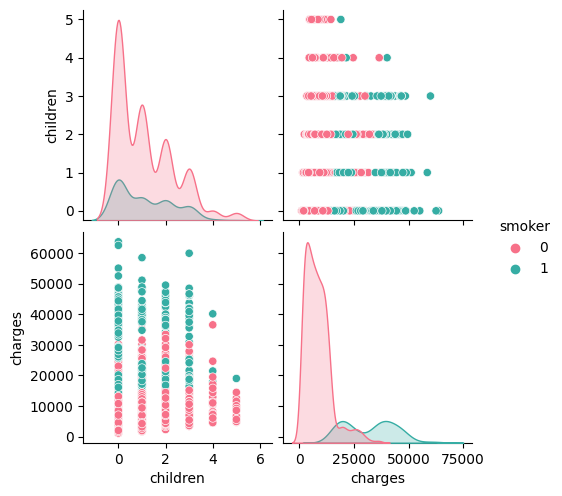

In [47]:
#Pairplot of all numerical variables
import seaborn as sns

# Pairplot of all numerical variables
sns.pairplot(data, vars=[ 'children', 'charges'], hue='smoker', palette="husl")
plt.show()

In [52]:
data

,bmi,children,smoker,region,charges,Age_range,bmi_range
0,NaN,0,1,southwest,16884.92400,NaN,NaN
1,NaN,1,0,southeast,1725.55230,NaN,NaN
2,NaN,3,0,southeast,4449.46200,NaN,NaN
3,NaN,0,0,northwest,21984.47061,NaN,NaN
4,NaN,0,0,northwest,3866.85520,NaN,NaN
...,...,...,...,...,...,...,...
1333,NaN,3,0,northwest,10600.54830,NaN,NaN
1334,NaN,0,0,northeast,2205.98080,NaN,NaN
1335,NaN,0,0,southeast,1629.83350,NaN,NaN
1336,NaN,0,0,southwest,2007.94500,NaN,NaN


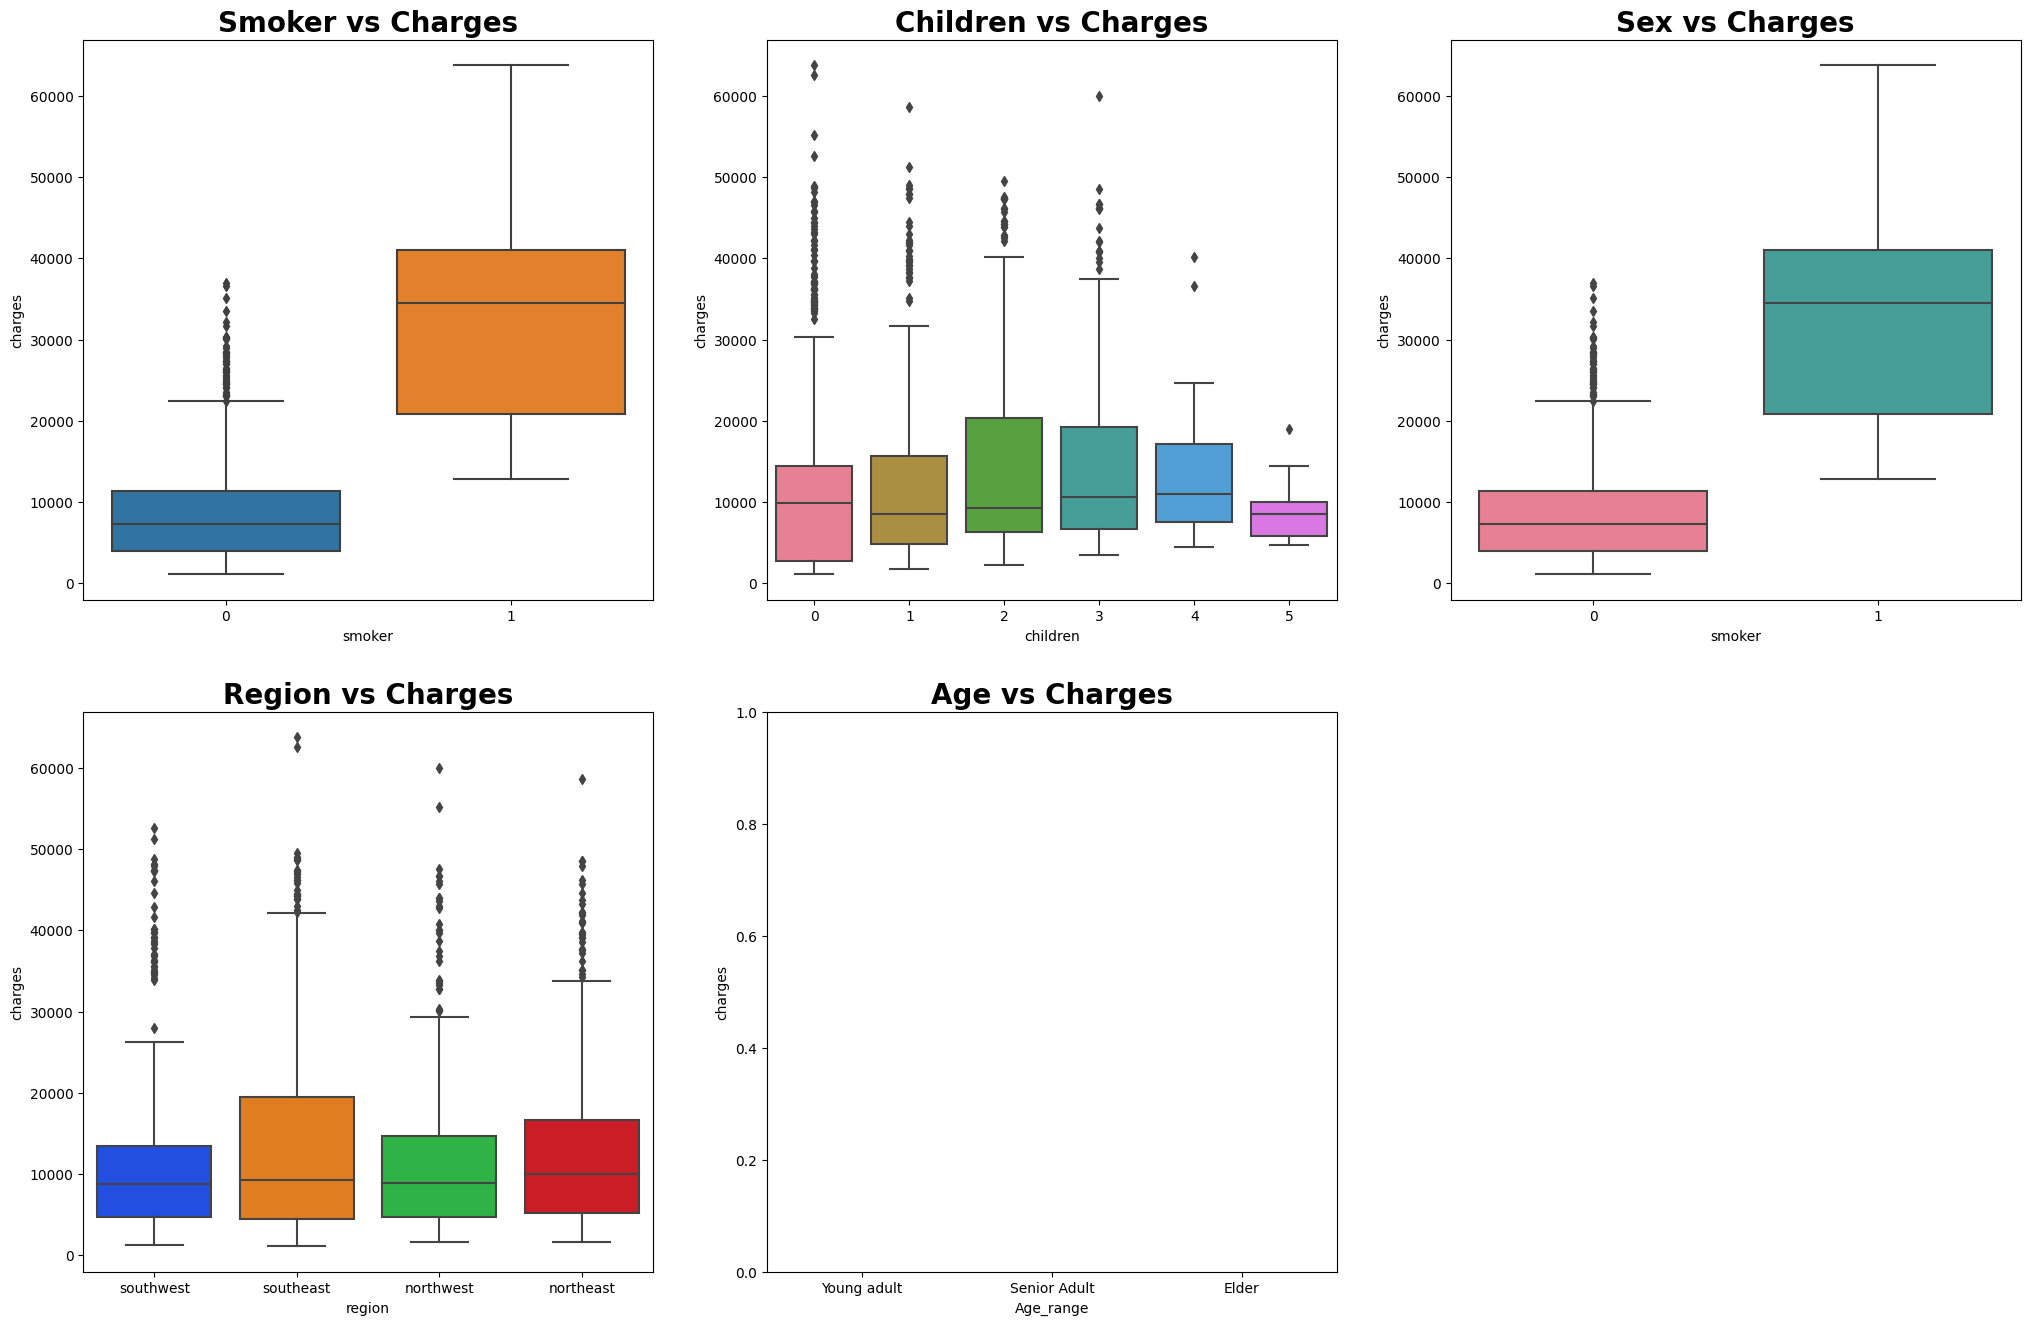

In [53]:
plt.figure(figsize=(25, 16))
plt.subplot(2,3,1)
sns.boxplot(x = 'smoker', y = 'charges', data = data)
plt.title('Smoker vs Charges',fontweight="bold", size=20)
plt.subplot(2,3,2)
sns.boxplot(x = 'children', y = 'charges', data = data,palette="husl")
plt.title('Children vs Charges',fontweight="bold", size=20)
plt.subplot(2,3,3)
sns.boxplot(x = 'smoker', y = 'charges', data = data, palette= 'husl')
plt.title('Sex vs Charges',fontweight="bold", size=20)
plt.subplot(2,3,4)
sns.boxplot(x = 'region', y = 'charges', data = data,palette="bright")
plt.title('Region vs Charges',fontweight="bold", size=20)
plt.subplot(2,3,5)
sns.boxplot(x = 'Age_range', y = 'charges', data = data, palette= 'husl')
plt.title('Age vs Charges',fontweight="bold", size=20)
plt.show()

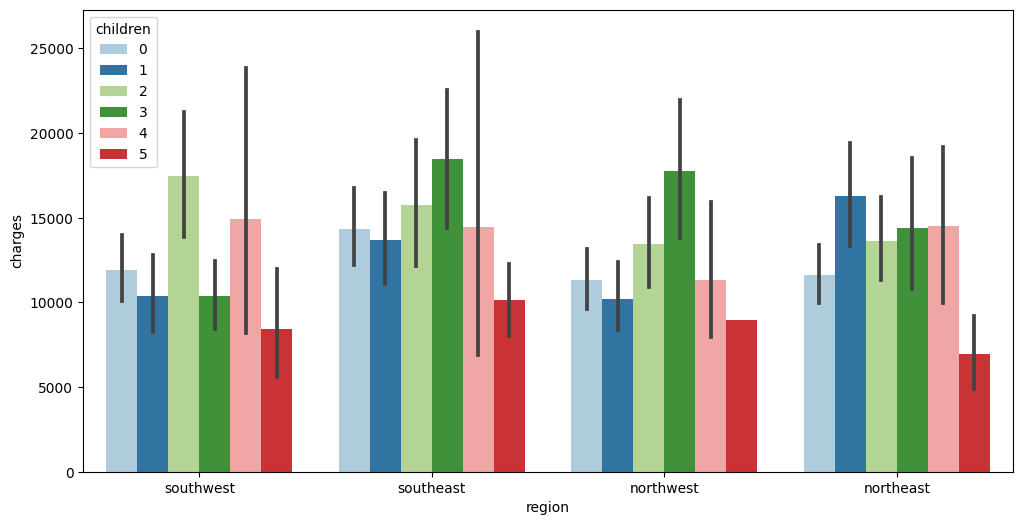

In [56]:
plt.figure(figsize=(12,6))
sns.barplot(x='region', y='charges', hue='children', data=data, palette='Paired')
plt.show()

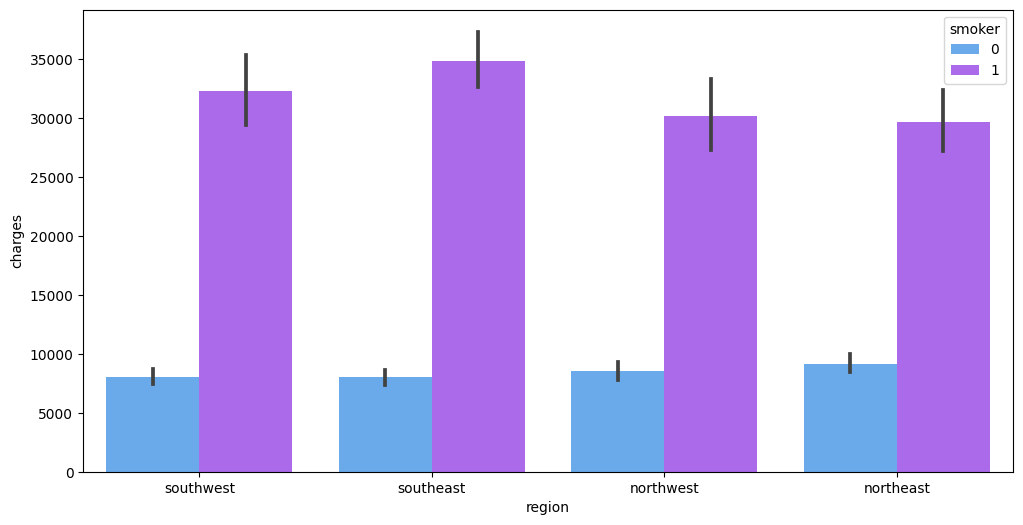

In [57]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'region', y = 'charges',hue='smoker', data=data, palette='cool')
plt.show()

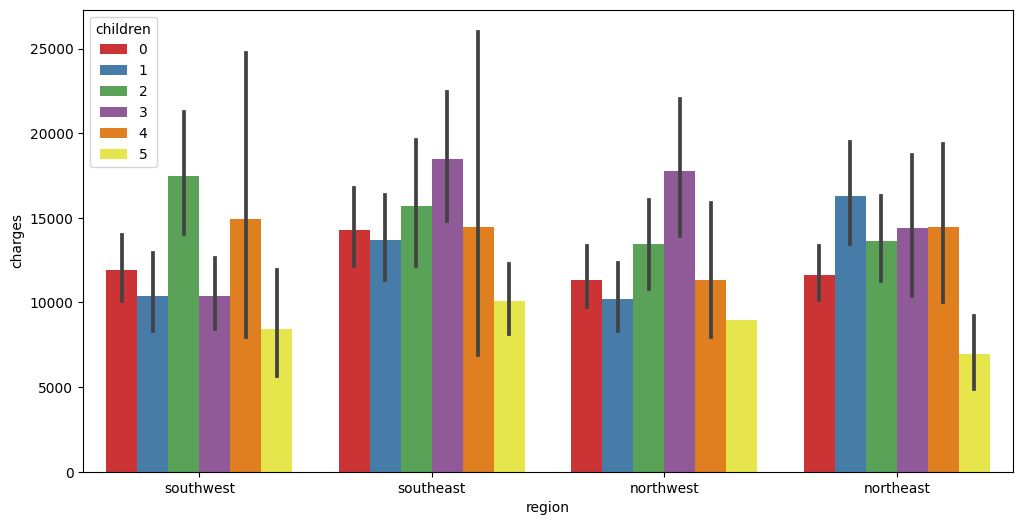

In [58]:
plt.figure(figsize=(12,6))
sns.barplot(x='region', y='charges', hue='children', data=data, palette='Set1')
plt.show()

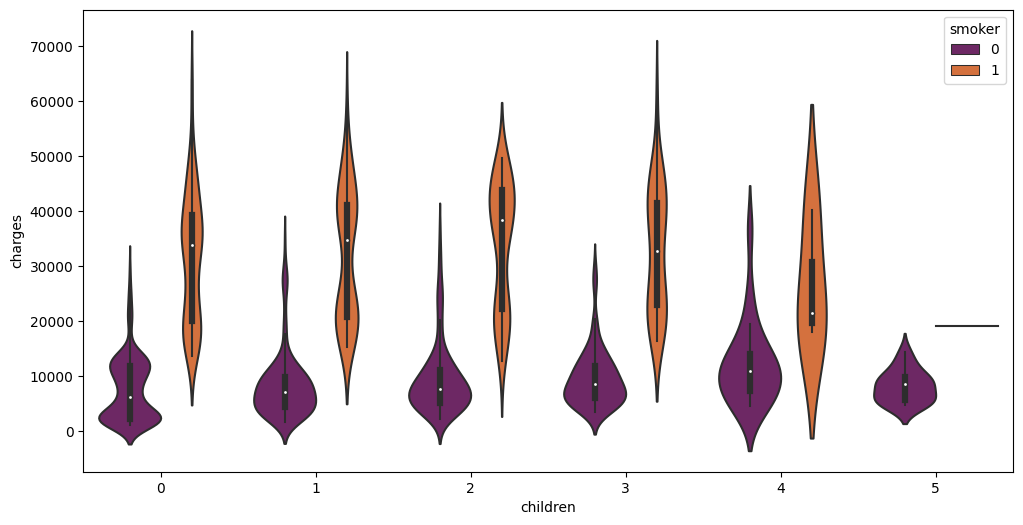

In [60]:
plt.figure(figsize=(12,6))
sns.violinplot(x = 'children', y = 'charges', data=data, hue='smoker', palette='inferno')
plt.show()

<ipython-input-62-aae104385750>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap='RdYlGn', annot = True)


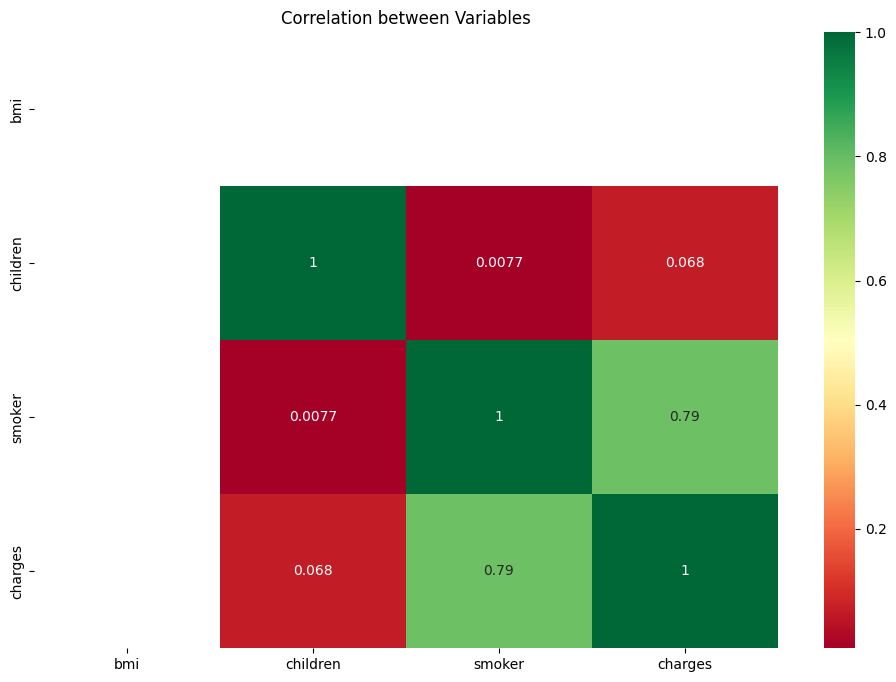

In [62]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), cmap='RdYlGn', annot = True)
plt.title("Correlation between Variables")
plt.show()

In [63]:
data.head()

,bmi,children,smoker,region,charges,Age_range,bmi_range
0,NaN,0,1,southwest,16884.92400,NaN,NaN
1,NaN,1,0,southeast,1725.55230,NaN,NaN
2,NaN,3,0,southeast,4449.46200,NaN,NaN
3,NaN,0,0,northwest,21984.47061,NaN,NaN
4,NaN,0,0,northwest,3866.85520,NaN,NaN


In [64]:
region=pd.get_dummies(data.region,drop_first=True)
Age_range=pd.get_dummies(data.Age_range,drop_first=True)
children= pd.get_dummies(data.children,drop_first=True,prefix='children')

In [65]:
data=pd.concat([region,Age_range,children,data],axis=1)
data.head()

,northwest,southeast,southwest,Senior Adult,Elder,children_1,children_2,children_3,children_4,children_5,bmi,children,smoker,region,charges,Age_range,bmi_range
0,0,0,1,0,0,0,0,0,0,0,NaN,0,1,southwest,16884.92400,NaN,NaN
1,0,1,0,0,0,1,0,0,0,0,NaN,1,0,southeast,1725.55230,NaN,NaN
2,0,1,0,0,0,0,0,1,0,0,NaN,3,0,southeast,4449.46200,NaN,NaN
3,1,0,0,0,0,0,0,0,0,0,NaN,0,0,northwest,21984.47061,NaN,NaN
4,1,0,0,0,0,0,0,0,0,0,NaN,0,0,northwest,3866.85520,NaN,NaN


In [68]:
data.drop(['region', 'Age_range', 'children'], axis = 1, inplace = True)
data.head()

,northwest,southeast,southwest,Senior Adult,Elder,children_1,children_2,children_3,children_4,children_5,bmi,smoker,charges,bmi_range
0,0,0,1,0,0,0,0,0,0,0,NaN,1,16884.92400,NaN
1,0,1,0,0,0,1,0,0,0,0,NaN,0,1725.55230,NaN
2,0,1,0,0,0,0,0,1,0,0,NaN,0,4449.46200,NaN
3,1,0,0,0,0,0,0,0,0,0,NaN,0,21984.47061,NaN
4,1,0,0,0,0,0,0,0,0,0,NaN,0,3866.85520,NaN


In [69]:
data.shape

(1338, 14)

<ipython-input-70-2de000bcd273>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap='YlGnBu', annot = True)


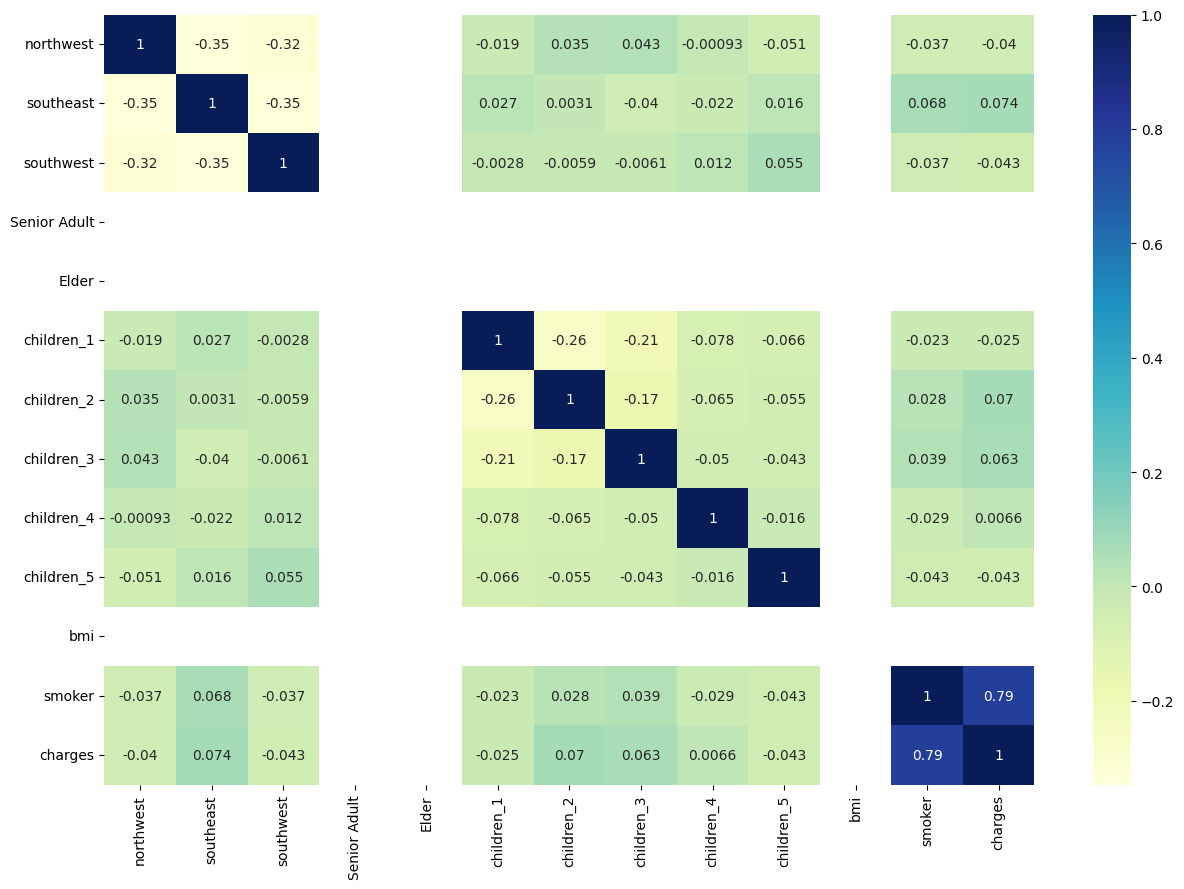

In [70]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), cmap='YlGnBu', annot = True)
plt.show()

In [73]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, train_size = 0.7, random_state = 100)

In [74]:
print(data_train.shape)
print(data_test.shape)

(936, 14)
(402, 14)


In [75]:
from sklearn.preprocessing import MinMaxScaler

In [77]:
data.head()

,northwest,southeast,southwest,Senior Adult,Elder,children_1,children_2,children_3,children_4,children_5,bmi,smoker,charges,bmi_range
0,0,0,1,0,0,0,0,0,0,0,NaN,1,16884.92400,NaN
1,0,1,0,0,0,1,0,0,0,0,NaN,0,1725.55230,NaN
2,0,1,0,0,0,0,0,1,0,0,NaN,0,4449.46200,NaN
3,1,0,0,0,0,0,0,0,0,0,NaN,0,21984.47061,NaN
4,1,0,0,0,0,0,0,0,0,0,NaN,0,3866.85520,NaN


In [78]:
scaler = MinMaxScaler()
num_vars=['bmi','charges']
data_train[num_vars] = scaler.fit_transform(data_train[num_vars])
data_train.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:473: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:474: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


,northwest,southeast,southwest,Senior Adult,Elder,children_1,children_2,children_3,children_4,children_5,bmi,smoker,charges,bmi_range
966,1,0,0,0,0,0,1,0,0,0,NaN,1,0.364661,NaN
522,0,0,0,0,0,0,0,0,0,0,NaN,0,0.139579,NaN
155,1,0,0,0,0,0,0,0,0,0,NaN,0,0.093008,NaN
671,0,0,0,0,0,0,0,0,0,0,NaN,0,0.045040,NaN
1173,1,0,0,0,0,0,1,0,0,0,NaN,0,0.085173,NaN


In [79]:
y_train = data_train.pop('charges')
X_train = data_train

In [88]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [2]:
def linear_regression(x_train, y_train):
    # Add a column of ones to x_train for the intercept term
    ones = np.ones((x_train.shape[0], 1))
    x_train = np.concatenate((ones, x_train), axis=1)
    
    # Calculate the coefficients using the normal equation
    coefficients = np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T).dot(y_train)
    
    return coefficients


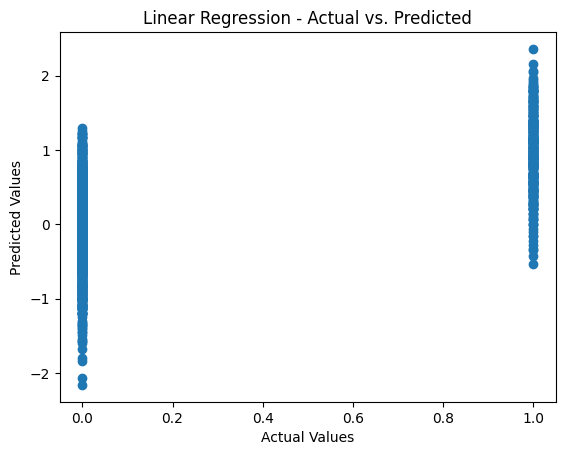

In [94]:
def visualize_predictions(x_train, y_train, coefficients):
    # Add a column of ones to x_train for the intercept term
    ones = np.ones((x_train.shape[0], 1))
    x_train = np.concatenate((ones, x_train), axis=1)
    
    # Calculate the predicted values
    y_train_pred = x_train.dot(coefficients)
    
    # Scatter plot of predicted values vs. actual values
    plt.scatter(y_train, y_train_pred)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Linear Regression - Actual vs. Predicted')
    plt.show()

# Example usage
# Assuming x_train and y_train are the input features and output respectively

# Load the medical price dataset
data = pd.read_csv('/content/Medical Price Dataset.csv')

# Drop irrelevant columns if necessary
data = data.drop(['age', 'sex'], axis=1)

# Convert categorical variables to one-hot encoding
data_encoded = pd.get_dummies(data)

# Convert non-numeric values to numeric representations
data_encoded = data_encoded.apply(pd.to_numeric, errors='coerce')

# Drop rows with missing or NaN values
data_encoded = data_encoded.dropna()

# Extract the features (x_train) and output (y_train)
x_train = data_encoded.iloc[:, :-1].values
y_train = data_encoded.iloc[:, -1].values

# Perform linear regression
coefficients = linear_regression(x_train, y_train)

# Visualize the predictions
visualize_predictions(x_train, y_train, coefficients)


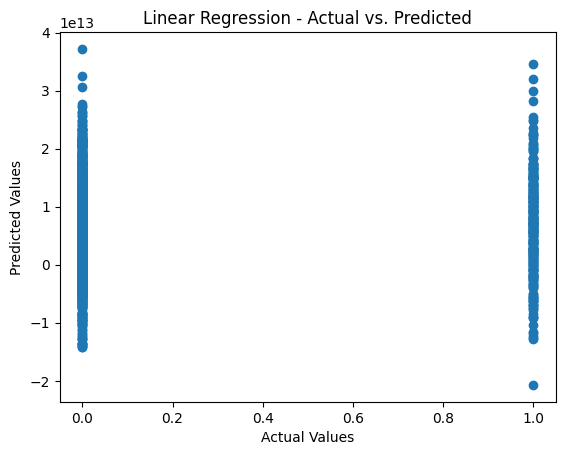

In [96]:
data = pd.read_csv('/content/Medical Price Dataset.csv')

# Drop irrelevant columns if necessary
data = data.drop(['age', 'region'], axis=1)

# Convert categorical variables to one-hot encoding
data_encoded = pd.get_dummies(data)

# Convert non-numeric values to numeric representations
data_encoded = data_encoded.apply(pd.to_numeric, errors='coerce')

# Drop rows with missing or NaN values
data_encoded = data_encoded.dropna()

# Extract the features (x_train) and output (y_train)
x_train = data_encoded.iloc[:, :-1].values
y_train = data_encoded.iloc[:, -1].values

# Perform linear regression
coefficients = linear_regression(x_train, y_train)

# Visualize the predictions
visualize_predictions(x_train, y_train, coefficients)
